# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 2</span>

---
Lecturer: Truyen Tran | truyen.tran@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, 11th May 2018 </span>
---

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 2. Some sections have been partially completed  to help you get started. **The total marks for this notebook is 200**.

* Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment2_instructions.pdf*  to know what else you need to complete for this assignment as well submission instruction. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


### Submission

You are required to submit **five** files: <br><br>

* The source of your solution notebook: **[groupID]_assignment2_solution.ipynb**
* An exported version of your output: **[groupID]_assignment2_output.html**  
* Three json data files storing tweets collected for three keywords, named **[groupID]_w1.json**, **[groupID]_w2.json**, **[groupID]_w3.json** where **w1, w2, w3** are the three keywords you selected.
    


As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instruction** mean the instructions given to you to complete the designated section.

## <span style="color:#0b486b">Part 1: Crawling and Storing Tweet Data for Australia</span>


The first part of the assignment examines your skills and knowledge to query tweets and store them in json files. For **each** selected keyword, your tasks are:

* Crawl all tweets contain this keyword written in English and geocoded within Australia.
* Store the tweets collected into json files.

***Follow the instructions below to complete your task***.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell.

In [1]:
'''
Import packages needed for processing
'''
import re
import json
import numpy as np
from collections import Counter
from TwitterAPI import TwitterAPI # in case you need to install this package, see practical 6
from sklearn.cluster import KMeans

import requests

# disabling urllib3 warnings
requests.packages.urllib3.disable_warnings()

import matplotlib.pyplot as plt
%matplotlib inline

'''
If you need add any additional packages, then add them below
'''
import json

**Instruction 1.1**. Enter your selected keywords to the variable **keywords** below.

[**Total mark: 3**]

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Enter the list of three keywords you selected to the variables keywords below
e.g. keywords = ["game","bike","fiction"]
'''

keywords = ["game","bike","fiction"] # INSERT YOUR CODE 

**Instruction 1.2**. Before you can perform a query to Twitter API, you need to supply authentication information. Practical sessions 6 and 7 show you how to obtain this information. **Your task is to supply the authentication information in the cell below**.

**Note**: You might decide to regenerate this authentication from the pracs if you would like too. <span style="color:red">After the assignment has been marked, you are strongly recommended to regenerate this authentication information from your account to maintain your privacy.</span> 


[**Total mark: 5**]

In [3]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Twitter API credentials 
CONSUMER_KEY =  "ihqmqR1jJQ1g0I5IKcEKrbHr1"#ENTER YOUR CONSUMER_KEY
CONSUMER_SECRET = "oBYqs6yMNlbPC7acVD80W9HQQTtw27oDa7CRzzJbI5sWMKQ77s"#ENTER YOUR CONSUMER_SECRET
OAUTH_TOKEN = "939424711028740097-KgPDxQn02juU9t9XsmdAPzzvdKVqsLL" #ENTER YOUR OAUTH_TOKEN
OAUTH_TOKEN_SECRET = "b3whAx9mywsj9FpFWMSzAT5T5o4U5YUAMSU0PNBRZRA8B"  #ENTER YOUR OAUTH_TOKEN_SECRET

# Authonticating with your application credentials
api = TwitterAPI(CONSUMER_KEY,
                 CONSUMER_SECRET,
                 OAUTH_TOKEN,
                 OAUTH_TOKEN_SECRET)
                 # INSERT YOUR CODE HERE
                 

**Note**: As you have learned from the pracical sessions, to perform a query from Twitter API for a particular geo-coded location you need a center point and a radius. The center point is specified by its (latitude,longitute) pair. **The information below has been given to you to perform the query in the subsequent tasks**. **Do not** modify these variables.

In [4]:
# geo coordinations of the desired place
AUS_LAT = -24.396176
AUS_LONG = 133.247614
AUS_RADIUS = 1500

**Instruction 1.3**. For each keyword, you are required to crawl at least **500** tweets using the Twitter API. However, as you have learned from the practical sessions, each query will return a maximum of only **100** tweets. Therefore, subsequent query **must** use the maximum Tweet ID from the previous batch to crawl the next lot.

The following function, called ***retrieve_tweets()***, has been **partially** implemented to automatically download tweets until it reaches the maximum number of tweets needed. 

For example, a function call
```
retrieve_tweets(api,'car',50,500)
```
will attempt to crawl a total of at least 500 tweets that contains the word 'car'. Within each single query, it will attempt to obtain 50 tweets. For this assignment, by default we will query within Australian region specified by the latitute, longitude and radius specified before.

**Your task is to walk through this function and enter your own codes where instructed to complete the function**.

[**Total mark: 14**]

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
You will be required to insert your own codes to complete this function. 
Walk through this function and enter your own codes where instructed.
'''
def retrieve_tweets(api, keyword, batch_count, total_count):
    """
    collects tweets using the Twitter search API
    
    api:         Twitter API instance
    keyword:     search keyword
    batch_count: maximum number of tweets to collect per each request
    total_count: maximum number of tweets in total
    """
    
    # the collection of tweets to be returned
    tweets = []
    
    # the number of tweets within a single query
    batch_count = str(batch_count)
    
    '''
    You are required to insert your own code where instructed to perform the first query to Twitter API.
    Hint: revise the practical session on Twitter API on how to perform query to Twitter API.
    '''
    # per the first query, to obtain max_id_str which will be used later to query sub
    resp = api.request('search/tweets', {'q': keyword,
                                         'count': '100',#INSERT YOUR CODE
                                         'lang':'en',
                                         'result_type':'recent',
                                         'geocode':'{},{},{}mi'.format(AUS_LAT, AUS_LONG,AUS_RADIUS)
                                        }
                      )
    
    # store the tweets in a list
    tweets += resp.json()['statuses']
    
    # find the max_id_str for the next batch
    ids = [tweet['id'] for tweet in tweets]
    max_id_str = str(min(ids))

    # loop until as many tweets as total_count is collected
    number_of_tweets = len(tweets)
    while number_of_tweets < total_count:
        print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                        keyword, 
                                                                                        tweets[number_of_tweets-1]['created_at']))
        resp = api.request('search/tweets', {'q': keyword,
                                             'count':'100',
                                             'lang':'en',
                                             'result_type':'recent',#INSERT YOUR CODE
                                             'max_id':'id' , #INSERT YOUR CODE
                                             'geocode':'{},{},{}mi'.format(AUS_LAT, AUS_LONG,AUS_RADIUS)
                                             #INSERT YOUR CODE
                                            }
                          )

        tweets += resp.json()['statuses']
        ids = [tweet['id'] for tweet in tweets]
        max_id_str = str(min(ids))
        number_of_tweets = len(tweets)
        
    print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                    keyword, 
                                                                                    tweets[number_of_tweets-1]['created_at']))
    return tweets

**Instruction 1.4**. After having defined the ***retrieve_tweets()*** function above, you are now ready to use this function to collect your tweets. Your task is to write the code to perform three function calls, each corresponds to one keyword. And, you are required to collect at least **500** tweets for each key word.

[**Total mark: 9**]

In [6]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Your task is to write the code to perform three function calls, each corresponds to one keyword. 
And, you are required to collect at least 500 tweets for each key word.
'''

# Collecting the tweets for three assigned keywords, 
# Your function call should look like this:  retrieve_tweets(api,'keyword',single_count,total_count)

k1_tweets = retrieve_tweets(api, 'game', 50, 500)               #INSERT YOUR CODE HERE
k2_tweets = retrieve_tweets(api, 'bike', 50, 500)#INSERT YOUR CODE HERE
k3_tweets = retrieve_tweets(api, 'fiction', 50, 500)#INSERT YOUR CODE HERE

# PLEASE NOTE THAT IF YOU RUN THIS CELL, IT MIGHT TAKE A WHILE TO DOWNLOAD ALL THE TWEETS REQUIRED.
# MAKE SURE THAT YOU WAIT UNTILL THE CELL FINISHES RUNNING.

100 tweets are collected for keyword game. Last tweet created at Thu May 10 04:57:22 +0000 2018
200 tweets are collected for keyword game. Last tweet created at Thu May 10 04:57:22 +0000 2018
300 tweets are collected for keyword game. Last tweet created at Thu May 10 04:57:22 +0000 2018
400 tweets are collected for keyword game. Last tweet created at Thu May 10 04:57:22 +0000 2018
500 tweets are collected for keyword game. Last tweet created at Thu May 10 04:57:30 +0000 2018
100 tweets are collected for keyword bike. Last tweet created at Wed May 09 23:50:29 +0000 2018
200 tweets are collected for keyword bike. Last tweet created at Wed May 09 23:50:29 +0000 2018
300 tweets are collected for keyword bike. Last tweet created at Wed May 09 23:50:29 +0000 2018
400 tweets are collected for keyword bike. Last tweet created at Wed May 09 23:50:29 +0000 2018
500 tweets are collected for keyword bike. Last tweet created at Wed May 09 23:50:29 +0000 2018
100 tweets are collected for keyword fic

**Instruction 1.5**. To verify the downloading process, write your code to print out the number of tweets which has been collected for each keyword.

[**Total mark: 3**]

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print the number of tweets have been collected for each keyword
'''
# INSERT OUR CODE HERE
print(len(k1_tweets))
print(len(k2_tweets))
print(len(k3_tweets))

500
500
500


**Note:** Each tweet is stored in a dictionary where its keywords are fields in the tweet and values are the information of the fields. The cell below print the type of a tweet.

In [8]:
# Data type of tweets
print(type(k1_tweets[0]))

<class 'dict'>


**Instruction 1.6**.  To examine what the tweets look like, in the cell below write your code to print out all fields of the first tweet in `k1_tweets` and print out the text of the first tweet collected for each keyword.

[**Total mark: 6**]

In [9]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out all fields of the first tweet
Hint: You might want to use method keys() of the dictionary
'''# INSERT YOUR CODE HERE

print(k1_tweets[0].keys())
'''
Write your code to print out the text of the first  tweet collected for each keyword.
'''

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[0]))
print(k1_tweets[0]['text'])# INSERT YOUR CODE HERE

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[1]))
print(k2_tweets[0]['text'])
          # INSERT YOUR CODE HERE

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[2]))
print(k3_tweets[0]['text'])# INSERT YOUR CODE HER3

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

The text of the first tweet for "game":

Check out this event in #GranblueFantasy! https://t.co/U9Wyxc8HCf https://t.co/SZl0ENCWgc

The text of the first tweet for "bike":

RT @cityofmelbourne: We're at the corner of Cardigan St and Argyle Place North fixing bikes. 
Come and use our free bike fix and maintenanc…

The text of the first tweet for "fiction":

ICYMI. Some great company there! And @TitanBooks "No Good Deed", my story from New Fears 1, is on the shortlist for… https://t.co/ikVDWC0eWX


**Note**. When collecting data from the Internet, such as Twitter, it is important that we store the data collected in an appropriate format for later data analysis task. We have learned that json is a poplular lightweight data format that can be handy to store unstructured data. For example, with NoSQL we can directly query these files in a 'scaling out' fashion. These technologies are representative features of Big Data Analytics.

The following function has been designed for you to save an object which is a list of dictionaries (such as k1_tweets variable) to a json file. **You will need this function for your next task**.

In [10]:
def save_to_json(obj, filename):
    """
    saves a list of dictionaries into a json file
    
    obj: list of dictionaries
    filename: filename
    """
    with open(filename, 'w') as fp:
        json.dump(obj, fp, indent=4, sort_keys=True)   

**Instruction 1.7**. Use the function ***save_to_json()*** defined above, for each collection of tweets you have crawled for each keyword, save them into a file named **w.json** where **w** is the keyword.

For example, if your keywords are 'w1', 'w2' and 'w3', then your code must generate three file w1.json, w2.json and w3.json. **Important: you must submit these files together with your notebook solution**.

[**Total mark: 9**]

In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Use the save_to_json() function defined above, for the collection of tweets 
you have crawled for each keyword, save them into a file named w.json where w is the keyword.
'''
# saving the tweets in three json files, one for each keyword
#INSERT YOUR CODE HERE
save_to_json(k1_tweets, 'game.json')
save_to_json(k2_tweets, 'bike.json')
save_to_json(k3_tweets, 'fiction.json')



###                                     END OF PART 1
----

## Part 2: Data Analytics

The second part of this assignment will examine your skills and knowlege in data manipulation and analysis tasks. It includes three main components:

**Part 2A**. For each keyword, you will be required to load the tweets from your saved json files (from Part 1) and filter out all tweets that are too short.

**Part 2B**. Using your knowledge from practical session 5 to 7 to construct the term-by-document matrix for the tweets and perform visualisation tasks to understand them.

**Part 2C**. Applying the Kmeans clustering algorithm to cluster your tweets and report the clustering results.

***Follow the instructions below to complete your assigned tasks***.

### Part 2A: Load and Filter Tweets from Files

**Instruction 2.1**. The following function, named ***read_json_file()***, has been partially implemented to load data from a json file. This function will be used later on to load three json files you have saved from Part 1. Your task is to insert your own code where instructed to complete this function.

[**Total mark: 3**]

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Insert your own code where instructed to complete this function
'''
def read_json_file(filename):
    """
    reads from a json file and saves the result in a list named data
    """
    with open(filename, 'r') as fp:
        d = json.load(fp)
        data = d
        # INSERT THE MISSING PIECE OF CODE HERE
        return data     

**Instruction 2.2**. Now use the ***read_json_file()*** function defined above, write three function calls to load data from three json files you have saved from Part 1.

[**Total mark: 9**]

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write three function calls to load data from three json files you have saved from Part 1.
'''

k1_tweets  = read_json_file('game.json')# INSERT YOUR CODE HERE
k2_tweets = read_json_file('bike.json')# INSERT YOUR CODE HERE
k3_tweets = read_json_file('fiction.json')# INSERT YOUR CODE HERE

**Instruction 2.3**. To examine the number of tweets loaded from your data files, write your code to print out the number of tweets containes in three variables: ***k1_tweets, k2_tweets*** and ***k3_tweets***.

[**Total mark: 3**]

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out the number of tweets containes in three variables: 
k1_tweets, k2_tweets and k3_tweets
'''
#INSERT YOUR CODE HERE
print(len(k1_tweets))
print(len(k2_tweets))
print(len(k3_tweets))

500
500
500


**Note**. When analysing tweets and text documents in general, an important analytics skill is to pre-process and filter the data into the form that one can start to apply analytics methods to extract knowledge. 

Tweets that are too short might not be useful for analysis. We define that tweets having less than 50 characters are short and should be remove. 

**Instruction 2.4**. In this task, you need to filter all short tweets.

1. Write a function called `is_short_tweet` that takes a tweet as an input and return True if the text of the tweet has less than 50 characters and False otherwise. **(6 marks)**

2. Write your codes to remove all tweets that have less than 50 characters in variables ***k1_tweets***, ***k2_tweets*** and ***k3_tweets*** and store the results in the new variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***, respectively. **(6 marks)**

[**Total mark: 12**]

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
def is_short_tweet(tweet):
    if len(tweet['text'])<50:
        return True
    else: 
        return False
    '''
    Check if the text of "tweet" has less than 50 characters
    '''
    # INSERT YOUR CODE HERE
is_short_tweet(k1_tweets[420])    


    


False

In [16]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to remove all tweets which have less than 50 characters in variables 
k1_tweets, k2_tweets and k3_tweets and store the results in the new variables 
k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered respectively
'''

k1_tweets_filtered = []
for i, c in enumerate(k1_tweets):
    if len(c['text'])<50:
        c.clear
    else:
        k1_tweets_filtered.append(c)
        
k2_tweets_filtered = []
for i, c in enumerate(k2_tweets):
    if len(c['text'])<50:
        c.clear
    else:
        k2_tweets_filtered.append(c)
            
k3_tweets_filtered = []
for i, c in enumerate(k3_tweets):
    if len(c['text'])<50:
        c.clear
    else:
        k3_tweets_filtered.append(c)
'''
    Check if the text of "tweet" has less than 50 characters
'''

         
         # INSERT YOUR CODE HERE

         
print(len(k1_tweets), len(k1_tweets_filtered))  
print(len(k2_tweets), len(k2_tweets_filtered))
print(len(k3_tweets), len(k3_tweets_filtered))


# these lines below print the number of tweets for each keyword before and after filtered.


500 485
500 490
500 475


**Instruction 2.5**. For each keyword, print out the number of tweets that have been removed.

[**Total mark: 3**]

In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
For each keyword, print out the number of tweets that have been removed.
'''
print(len(k1_tweets) - len(k1_tweets_filtered))
print(len(k2_tweets) - len(k2_tweets_filtered))
print(len(k3_tweets) - len(k3_tweets_filtered))
# INSERT YOUR CODE HERE


15
10
25


**Instruction 2.6**. To examine what the tweets look like after being loaded from the data files and filtered, in the cell below write your code to print out the first **5** tweets for each keyword. 

You **must** use the variables ***k1_tweets_filtered, k2_tweets_filtered*** and ***k3_tweets_filtered*** which have stored the data after the filtering process for this task.

[**Total mark: 3**]

In [18]:
type(k1_tweets)

list

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to print out the first 5 tweets for each keyword.
You must use the variables k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered 
which have stored the data after the filtering process for this task.

Hint: Using tweet['text'] for tweet in k1_tweets_filtered
'''

print('The first 5 tweets for \"{}\":\n'.format(keywords[0]))
for c, i in enumerate(range(5)):
    print(c, k1_tweets_filtered[i]['text'])# INSERT YOUR CODE HERE

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[1]))
for c, i in enumerate(range(5)):
    print(c, k2_tweets_filtered[i]['text'])# INSERT YOUR CODE HERE

print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[2]))
for c, i in enumerate(range(5)):
    print(c, k3_tweets_filtered[i]['text'])# INSERT YOUR CODE HERE

The first 5 tweets for "game":

0 Check out this event in #GranblueFantasy! https://t.co/U9Wyxc8HCf https://t.co/SZl0ENCWgc
1 Check out this event in #GranblueFantasy! https://t.co/BLym3I71jM https://t.co/6QGfNGReDA
2 RT @johndalton: 48 hours left to get in on Village Pillage - a 30-minute game of risk and betrayal! (I have played a pre-release version of…
3 @mynameisFACE Man this the NBA I grew up on. Especially watching my Knicks fight pj brown and Miami every game lol
4 Check out this event in #GranblueFantasy! https://t.co/7Ad3TwWlFK https://t.co/ijbUUlZveM

The first 5 tweets for "bike":

0 RT @cityofmelbourne: We're at the corner of Cardigan St and Argyle Place North fixing bikes. 
Come and use our free bike fix and maintenanc…
1 @_mglo_ It’s also so much easier carrying the backpack when riding a bike!
2 @darkbluesun Hi Chris, 
I'm not aware of any hire bike style scheme being installed at this stage. We will see if w… https://t.co/ZSxQbk15cZ
3 &amp; I saw someone get hit on a b

### Part 2B: Constructing Term-by-Document Matrix

As we have learned in our class, in text analytics and in general dealing with unstructured data, to start perform **computational** tasks such as computing the distance between two documents, we need to represent them in **numerical** formats. A popular technique we have learned is the bag-of-word representation and the term-by-document matrix, also known as the vector-space model.

This part of the assignment will require you to construct the term-by-document matrix for the tweets stored in three variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***.

**Note.** Tweets are often not neat as you might have seen from early tasks. As tweet such as this 
```
Happy shopping👗👚👠👜 (with Vivi and Irmalia at @infomog) — https://t.co/fUGO9Eex1r
```
might contain non-ASCII characters, emoticon, punctuations, etc. Building a bag-of-word representation **without** pre-processing the data can be ineffective. 

The following function ***pre_process()*** has been designed to preprocess the data for you.

In [20]:
def remove_non_ascii(s): return "".join(i for i in s if ord(i)<128)
def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
      * removes words less that 3 characters
    """
    
    doc = doc.lower()
    # getting rid of non ascii codes
    doc = remove_non_ascii(doc)
    
    # replacing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|\?|_|,|=|;|>|<|\.|\@"
    doc = re.sub(punctuation, ' ', doc)
    
    return [w for w in doc.split() if len(w) > 2]

**Note**. For example, the following code will display the first tweet stored in the variable ***k1_tweets_filtered*** (for the first keyword) before and after it has been pre-processed.

In [21]:
tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print(tweet_k1)
# tweet_k1_processed is now a list of words. 
# We use ' '.join() method to join the list to a string.
print(' '.join(tweet_k1_processed))



Check out this event in #GranblueFantasy! https://t.co/U9Wyxc8HCf https://t.co/SZl0ENCWgc
check out this event granbluefantasy url url


In [22]:
w1 = []
for k in k1_tweets_filtered:
    w1.append(pre_process(k['text']))

**Instruction 2.7**. Use the example above, write your code to display the **first** tweets stored in the variables ***k2_tweets_filtered*** and ***k2_tweets_filtered*** before and after they have been pre-processed using the function ***pre_process()*** supplied earlier.

[**Total mark: 4**]

In [23]:
for k in range(5):
    print(k2_tweets_filtered[k]['text'])
print()

k2_tweets_processed = []
for i, k in enumerate(k2_tweets_filtered):
    k2_tweets_processed.append(pre_process(k['text']))

print(k2_tweets_processed[0:5])

RT @cityofmelbourne: We're at the corner of Cardigan St and Argyle Place North fixing bikes. 
Come and use our free bike fix and maintenanc…
@_mglo_ It’s also so much easier carrying the backpack when riding a bike!
@darkbluesun Hi Chris, 
I'm not aware of any hire bike style scheme being installed at this stage. We will see if w… https://t.co/ZSxQbk15cZ
&amp; I saw someone get hit on a bike from someone who wasn’t paying attention to the road... 

(MESSAGE!)
fewer roads = happier drivers. 
Seems counterintuitive, but "removing lanes to add bike paths and widen sidewalks c… https://t.co/pJmmlxXFEr

[['cityofmelbourne', 'the', 'corner', 'cardigan', 'and', 'argyle', 'place', 'north', 'fixing', 'bikes', 'come', 'and', 'use', 'our', 'free', 'bike', 'fix', 'and', 'maintenanc'], ['mglo', 'its', 'also', 'much', 'easier', 'carrying', 'the', 'backpack', 'when', 'riding', 'bike'], ['darkbluesun', 'chris', 'not', 'aware', 'any', 'hire', 'bike', 'style', 'scheme', 'being', 'installed', 'this', 'st

In [24]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Use the example above, write your code to display the first tweets stored in 
the variables k2_tweets_filtered and k3_tweets_filtered before and after they 
have been pre-processed using the function pre_process() supplied earlier.
'''

# INSERT YOUR CODE HERE
for k in range(5):
    print(k2_tweets_filtered[k]['text'])
print()

k2_tweets_processed = []
for i, k in enumerate(k2_tweets_filtered):
    k2_tweets_processed.append(pre_process(k['text']))

print(k2_tweets_processed[0:5])
print()

for k in range(5):
    print(k3_tweets_filtered[k]['text'])
print()

k3_tweets_processed = []
for i, k in enumerate(k3_tweets_filtered):
    k3_tweets_processed.append(pre_process(k['text']))

print(k3_tweets_processed[0:5])
#ds2 = []
#for c, i in enumerate(k2_tweets_filtered):
#    print(c, i['text'])
#    ds2.append(i)

#k2_tweets_processed = []
#for i in (ds2):
#    k2_tweets_processed.append(pre_process(i['text']))

#print(k2_tweets_processed)

#ds3= []
#for c, i in enumerate(k3_tweets_filtered):
#    print(c, i['text'])
#    ds3.append(i)

#k3_tweets_processed = []
#for i in (ds3):
#    k3_tweets_processed.append(pre_process(i['text']))
    
#print(k3_tweets_processed)

#ds2 = []
#for c, i in enumerate(k2_tweets_filtered):
#    ds2.append(i['text'])

#k2_tweets_processed = pre_process(''.join(ds2))
#print('  '.join(k2_tweets_processed))

#ds3 = []
#for c, i in enumerate(k3_tweets_filtered):
#    ds3.append(i['text'])

#k3_tweets_processed = pre_process(''.join(ds3))
#print('  '.join(k3_tweets_processed))

RT @cityofmelbourne: We're at the corner of Cardigan St and Argyle Place North fixing bikes. 
Come and use our free bike fix and maintenanc…
@_mglo_ It’s also so much easier carrying the backpack when riding a bike!
@darkbluesun Hi Chris, 
I'm not aware of any hire bike style scheme being installed at this stage. We will see if w… https://t.co/ZSxQbk15cZ
&amp; I saw someone get hit on a bike from someone who wasn’t paying attention to the road... 

(MESSAGE!)
fewer roads = happier drivers. 
Seems counterintuitive, but "removing lanes to add bike paths and widen sidewalks c… https://t.co/pJmmlxXFEr

[['cityofmelbourne', 'the', 'corner', 'cardigan', 'and', 'argyle', 'place', 'north', 'fixing', 'bikes', 'come', 'and', 'use', 'our', 'free', 'bike', 'fix', 'and', 'maintenanc'], ['mglo', 'its', 'also', 'much', 'easier', 'carrying', 'the', 'backpack', 'when', 'riding', 'bike'], ['darkbluesun', 'chris', 'not', 'aware', 'any', 'hire', 'bike', 'style', 'scheme', 'being', 'installed', 'this', 'st

**Instruction 2.8**. Write your code to pre-process and clean up all tweets stored in the variable ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered*** using the function ***pre_process()*** to result in new variables ***k1_tweets_processed***, ***k2_tweets_processed*** and ***k3_tweets_processed***.

[**Total mark: 6**]

In [25]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
# INSERT YOUR CODE HERE
for k in range(5):
    print(k1_tweets_filtered[k]['text'])
print()

k1_tweets_processed = []
for i, k in enumerate(k1_tweets_filtered):
    k1_tweets_processed.append(pre_process(k['text']))

print(k1_tweets_processed[0:5])
print()

for k in range(5):
    print(k2_tweets_filtered[k]['text'])
print()

k2_tweets_processed = []
for i, k in enumerate(k2_tweets_filtered):
    k2_tweets_processed.append(pre_process(k['text']))

print(k2_tweets_processed[0:5])
print()

for k in range(5):
    print(k3_tweets_filtered[k]['text'])
print()

k3_tweets_processed = []
for i, k in enumerate(k3_tweets_filtered):
    k3_tweets_processed.append(pre_process(k['text']))

print(k3_tweets_processed[0:5])



Check out this event in #GranblueFantasy! https://t.co/U9Wyxc8HCf https://t.co/SZl0ENCWgc
Check out this event in #GranblueFantasy! https://t.co/BLym3I71jM https://t.co/6QGfNGReDA
RT @johndalton: 48 hours left to get in on Village Pillage - a 30-minute game of risk and betrayal! (I have played a pre-release version of…
@mynameisFACE Man this the NBA I grew up on. Especially watching my Knicks fight pj brown and Miami every game lol
Check out this event in #GranblueFantasy! https://t.co/7Ad3TwWlFK https://t.co/ijbUUlZveM

[['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['johndalton', 'hours', 'left', 'get', 'village', 'pillage', 'minute', 'game', 'risk', 'and', 'betrayal', 'have', 'played', 'pre', 'release', 'version'], ['mynameisface', 'man', 'this', 'the', 'nba', 'grew', 'especially', 'watching', 'knicks', 'fight', 'brown', 'and', 'miami', 'every', 'game', 'lol'], ['check', 'out', 'this', 'event',

In [26]:

ds = []
for c, i in enumerate(k1_tweets_filtered):
    print(c, i['text'])
    ds.append(i)

k1_tweets_processed = []
for i in (ds):
    k1_tweets_processed.append(pre_process(i['text']))

print(k1_tweets_processed)


ds2 = []
for c, i in enumerate(k2_tweets_filtered):
    print(c, i['text'])
    ds2.append(i)

k2_tweets_processed = []
for i in (ds2):
    k2_tweets_processed.append(pre_process(i['text']))

print(k2_tweets_processed)

ds3= []
for c, i in enumerate(k3_tweets_filtered):
    print(c, i['text'])
    ds3.append(i)

k3_tweets_processed = []
for i in (ds3):
    k3_tweets_processed.append(pre_process(i['text']))
    
print(k3_tweets_processed)

0 Check out this event in #GranblueFantasy! https://t.co/U9Wyxc8HCf https://t.co/SZl0ENCWgc
1 Check out this event in #GranblueFantasy! https://t.co/BLym3I71jM https://t.co/6QGfNGReDA
2 RT @johndalton: 48 hours left to get in on Village Pillage - a 30-minute game of risk and betrayal! (I have played a pre-release version of…
3 @mynameisFACE Man this the NBA I grew up on. Especially watching my Knicks fight pj brown and Miami every game lol
4 Check out this event in #GranblueFantasy! https://t.co/7Ad3TwWlFK https://t.co/ijbUUlZveM
5 #AustraliaOpenSuper300 
.
No surprise! Indonesian WS, Lyanny, lose to Yukino Nakai from Japan in 21-19 8-21 6-21. W… https://t.co/oTsycSanZ1
6 Top 5 ICO. Don't miss out! 
@ico_detector
Be in the game, top 5 ICOs right now.
    1. @Digitizecoin
    2.… https://t.co/EDwIqCcd6X
7 Check out this event in #GranblueFantasy! https://t.co/pAySXwk95B https://t.co/jGzzzhV43k
8 RT @NSWEducation: The Game Changer Challenge has BEGUN! Teachers, assemble your Game Changer

357 Tampa Bay Lightning, what a joke! Talk about taking the fun out of hockey. Probably scared the Capitals will win. B… https://t.co/E4gR1OQkbr
358 RT @KuroganeHammer: I still think it's bizarre to invite melee players to the invitational because theyre not gonna drop melee for the next…
359 RT @asiangames2018: It’s only 100 days left to the #AsianGames2018! Are you ready? Prepare yourself for the biggest game in Asia, now! http…
360 Destiny 2 appears to be going for some sort of record, for most number of unlikeable characters in a single game
361 Hey! I'm live right now for my first game stream. I'll be playing Shrinking Pains, a game jam visual novel! Kinda n… https://t.co/08fUq6SjDV
362 @Peter_Fitz @ClydeRathbone @smh No it is not Israel embarrassing the game, he is infact the games Numebr One asset.… https://t.co/1JlVhmZhhT
363 @afl @Robbo_heraldsun @markricciuto  how can nic Nat get suspended for a football act but Tom Mitchell only gets a… https://t.co/Ruui77aX7e
364 RT @Agness

[['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['johndalton', 'hours', 'left', 'get', 'village', 'pillage', 'minute', 'game', 'risk', 'and', 'betrayal', 'have', 'played', 'pre', 'release', 'version'], ['mynameisface', 'man', 'this', 'the', 'nba', 'grew', 'especially', 'watching', 'knicks', 'fight', 'brown', 'and', 'miami', 'every', 'game', 'lol'], ['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['australiaopensuper300', 'surprise', 'indonesian', 'lyanny', 'lose', 'yukino', 'nakai', 'from', 'japan', 'url'], ['top', 'ico', 'don', 'miss', 'out', 'ico', 'detector', 'the', 'game', 'top', 'icos', 'right', 'now', 'digitizecoin', 'url'], ['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['nsweducation', 'the', 'game', 'changer', 'challenge', 'has', 'begun', 'teachers', 'assemble', 'your', 'game', 'changer', '*teams', '&amp', 'register', 'here', 'url'], ['liked', 'yout

121 RT @cityofmelbourne: We're at the corner of Cardigan St and Argyle Place North fixing bikes. 
Come and use our free bike fix and maintenanc…
122 RT @cityofmelbourne: We're at the corner of Cardigan St and Argyle Place North fixing bikes. 
Come and use our free bike fix and maintenanc…
123 We're at the corner of Cardigan St and Argyle Place North fixing bikes. 
Come and use our free bike fix and mainten… https://t.co/ojpPfsKJLi
124 Is anyone available tomorrow lunchtime to help us set up the bike racks for the fat nats? And to take them down afterwards. 💪🚴🏻‍♂️🏅
125 Today is not one those days I like commuting by bike. I do it anyway. I fucking love it. I feel alive. Sucks to be… https://t.co/gOzpkIhKiA
126 ON YA BIKE!: Cycle Switzerland for the ultimate slow-travel experience https://t.co/yan9e1PEOW @MySwitzerland_e… https://t.co/bVHd5SNJ1m
127 MELBOURNE /// Would you pay a monthly subscription fee to use public transport, Uber and bike sharing services to t… https://t.co/zlAdmmlFzp

262 @AusCycle Gosh take me back ten years ago to my "incident" where I was T-boned at an intersection by a car off my b… https://t.co/46h5msctt6
263 RT @ttsocb5: 6 yr old son just had a violent bike crash in the yard. As he was going down, he was hollering “ ABORT!!! ABORT!!! ABORT!!!”  🤣
264 6 yr old son just had a violent bike crash in the yard. As he was going down, he was hollering “ ABORT!!! ABORT!!! ABORT!!!”  🤣
265 I'm adding a cool side scroller shooter mini game in my rpg, #PhoenixUndying. It's where you get to ride a hover bi… https://t.co/dGSCWf1OGr
266 Make a bike lane on all roads, for crying out loud. https://t.co/hNY3zQZDQo
267 RT @marino_angie: By request, here is the iconic scene when Bo Brady rode his bike to beautiful Oak Alley in New Orleans to meet Hope after…
268 RT @mediawisemelb: @FreeCyclists @kathyfrancis56 Agreed, as someone who is both a 'sporty cyclist' and a 'normal' bike rider #ametrematters…
269 @RJ_Nugent @vandenberglegs @JackSyit @abcsydney Incorrect. 

370 @supananmeniscus @bicycle_network When and why was the North Bank of the Yarra declared a "Shared Bike Path".  It w… https://t.co/bi7X5OJKf3
371 I’m so glad my dad went on a bike ride and isn’t here to see me freak out about the Black Hood
372 Ladies Back On Your Bike (LBOYB) are currently recruiting for cycle instructors. 
More Details:… https://t.co/jb1j0RRBJ0
373 RT @MelWuv: Christ on a bike, late to the party (thank you @7plus), and @CarolynBurnsMcC is doing it tough! Down like a sack of spuds, poor…
374 Annual Bike to School Day growing in popularity in Colorado Springs https://t.co/HvQiHf6wCP
375 "No room for Pedestrians on NYC's 8th Ave so they walk in Protected Bike Lane" https://t.co/bmNchO7t4w
376 @myesource That's how passengers on a train feel when someone brings their bike on board and takes up all that room
377 A strategic upgrade of footpaths and bike lanes across Murray Bridge has been proposed in a new council plan.

https://t.co/KyPDjYB5ZP
378 RT @gowordsmith1: @s

129 Carter Brown Pulp Fiction Novels 1950s Editions https://t.co/s0YAytYmNb via @Etsy
130 Ok but the people abusing Chris Pratt on his insta for what Star Lord did in Infinity War know he’s just an actor r… https://t.co/PclfMcvJzO
131 Woo! “The Deep launches its new 4D theatrical-immersive experience across multiple US locations.”
Plus updates on o… https://t.co/bIXCRwq72J
132 RT @NicoleR1706: A very filmy ep(its fiction anyway😅)
but absolutely power packed💪

Ive always wished that perpetrators of rape, etc b publ…
133 RT @iHeartSelZayn: “Don’t touch me, touch again on my clit” OMFG🤣🤣🤣@Roxetera is the screenwriter all tumblr fan fiction hope to be 🙌🏻🙌🏻🙌🏻🙌🏻…
134 @diary476 @LT_RyanM Much as I'd like to believe the church welcomes gay people as full members, I'm afraid that's a… https://t.co/BaB8QK4g0o
135 RT @curtisbrownaus: Congratulations to our wonder authors shortlisted for the 2018 @YABBA_Awards; 'Chip' by @kylie_howarth for Picture Stor…
136 Speculative fiction writing prompt: Frie

379 RT @WritersEdit: Things To Avoid When Writing Romantic Relationships -&gt; https://t.co/hxKR59E3Ez #Novel #WritingTips https://t.co/TJ0JnuLrtp
380 ICYMI. Some great company there! And @TitanBooks "No Good Deed", my story from New Fears 1, is on the shortlist for… https://t.co/ikVDWC0eWX
381 Oh @AustFiction "The Little Mermaid, in Passing" made the Australian Shadows Awards shortlist for short fiction. Th… https://t.co/szXP04z805
382 @leighturtle_art Ah so it turns out I write #cocky superhero fiction then ... https://t.co/b9pjXEloFr
383 Netflix's run of bad science-fiction features continues with ANON, which is another intricately pointless Andrew Ni… https://t.co/afZjWViY5d
384 RT @XanaMarketing: The Last Oracle: A Climate Change Fiction Thriller (Sam Jardine Crime Thrillers Book 3) Reality and Fantasy by @CHepwort…
385 RT @CHepworthAuthor: The Last Oracle: A Climate Change Fiction Thriller (Sam Jardine Crime Thrillers Book 3) Reality and Fantasy 
🌟🌟🌟🌟🌟A Ha…
386 How Fiction Helped

**Instruction 2.9**. Now, write your code to print out the **first 5 processed tweets** for each keyword *(the processed tweets are stored in **k1_tweets_processed**, **k2_tweets_processed** and **k3_tweets_processed**)*

[**Total mark: 7**]

In [27]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Now write your code to print out the first 5 processed tweets for each keyword.
Hint: Each tweet in tweets_processed is now a list of words, not a string. 
      To print a string, you might need to use ' '.join(tweet), 
      when tweet is a processed tweet

'''

print('The first 5 processed tweets for k1_tweets_processed:')
# INSERT YOUR CODE HERE
print(k1_tweets_processed[0:5])
print('\nThe first 5 processed tweets for k2_tweets_processed:')
# INSERT YOUR CODE HERE
print(k2_tweets_processed[0:5])
print('\nThe first 5 processed tweets for k3_tweets_processed:')
# INSERT YOUR CODE HERE
print(k3_tweets_processed[0:5])


The first 5 processed tweets for k1_tweets_processed:
[['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url'], ['johndalton', 'hours', 'left', 'get', 'village', 'pillage', 'minute', 'game', 'risk', 'and', 'betrayal', 'have', 'played', 'pre', 'release', 'version'], ['mynameisface', 'man', 'this', 'the', 'nba', 'grew', 'especially', 'watching', 'knicks', 'fight', 'brown', 'and', 'miami', 'every', 'game', 'lol'], ['check', 'out', 'this', 'event', 'granbluefantasy', 'url', 'url']]

The first 5 processed tweets for k2_tweets_processed:
[['cityofmelbourne', 'the', 'corner', 'cardigan', 'and', 'argyle', 'place', 'north', 'fixing', 'bikes', 'come', 'and', 'use', 'our', 'free', 'bike', 'fix', 'and', 'maintenanc'], ['mglo', 'its', 'also', 'much', 'easier', 'carrying', 'the', 'backpack', 'when', 'riding', 'bike'], ['darkbluesun', 'chris', 'not', 'aware', 'any', 'hire', 'bike', 'style', 'scheme', 'being', 'installed', 

**Note**. The following function ***construct_termdoc()*** has been implemented to construct the term-by-document matrix from a corpus of text data. **You will need this function for subsequent task**.

In [28]:
def construct_termdoc(docs, vocab=[]):
    """
    Construct a term-by-document-matrix
    
    docs: corpus
    vocab: pre-defined vocabulary
           if not supplied it will be automatically induced from the data
    
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    # vocab is not passed
    if vocab == []:
        vocab = set()
        termdoc_sparse = []

        for doc in docs:       
            # computes the frequencies of doc
            doc_sparse = Counter(doc)    
            termdoc_sparse.append(doc_sparse)
            
            # update the vocab
            vocab.update(doc_sparse.keys())  

        vocab = list(vocab)
        vocab.sort()
    
    else:
        termdoc_sparse = []        
        for doc in docs:
            termdoc_sparse.append(Counter(doc))
            

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.items():
            try:
                termdoc_dense[j, vocab.index(term)] = freq
            except:
                pass
            
    return termdoc_dense, vocab

**Note**. Now suppose that we would like to construct a term-by-document matrix for tweets collected for the **first keyword only**. The following piece of codes will do this by computing the term-by-document matrix and the vocabulary for tweets stored in **k1_tweets_processed**, print them out and visualise the corresponding term-by-document matrix stored in the variable ***k1_termdoc***. The corresponding vocabulary dictionary computed from this data will also be stored in the variable ***k1_vocab***.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
$5k $650 $trx &amp &gt


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

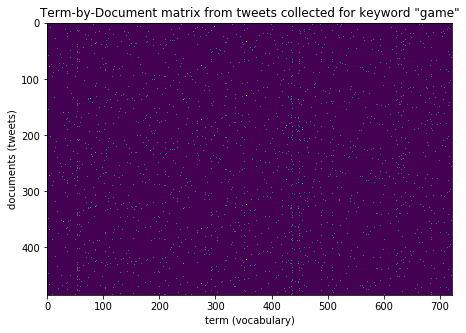

In [29]:
'''
compute the term-by-document matrix and the the dictionary from the collection of 
tweets collected for the first keyword
'''
k1_termdoc, k1_vocab = construct_termdoc(k1_tweets_processed)

# print out the term-by-document matrix
print(k1_termdoc)
# print out the first 5 vocabularies
print(' '.join(k1_vocab[:5]))  # print out only the first 5 vocabs

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Note**. Next, we would like to compute the pairwise distances between every two tweets. This will help us to see how similar tweets are. This is a computational task that would be *not* possible to do if we use the raw tweets.

However, with the term-by-document matrix, each tweet now is vector and corresponds to a row in the term-by-document matrix. Hence, we can use the distance between vectors to compute the distance between tweets. This is also known as the **vector space model** in information retrieval literature.

**Instruction 2.10**. Your tasks are:

1. Define a function to compute and return the Euclidean distance between two vectors as we have learned from the class notes. **(5 marks)**

2. Construct function that returns a distance matrix ***euclidean_distance_matrix*** whose element (i,j) stores the Eulidean distance between tweet i-th and i-jth. **You will need this function for subsequent task**. **(5 marks)**

**[Total mark: 10]**

In [30]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

def Euclidean_distance(x,y):
    '''
    Compute and return the Euclidean distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE
    dist = (np.array(x) - np.array(y))*(np.array(x) - np.array(y))
    return np.sqrt(dist.sum())

In [31]:
print(k1_vocab)

['$5k', '$650', '$trx', '&amp', '&gt', '*plays', '*teams', '100', '100%', '100s', '1soyeonryu', '1st', '2008', '2017', '355', '434', '483', '8pm', '[askmf]', '[eng', 'abcnews', 'about', 'act', 'actually', 'added', 'addiction', 'administrators', 'advice', 'aest', 'afl', 'africa', 'again*', 'against', 'agnessmack', 'ahh', 'album', 'all', 'allies', 'allowed', 'almost', 'alomakurosu', 'also', 'alvaromorata', 'amazed', 'ambidextrous', 'amount', 'and', 'anfield', 'anime', 'another', 'anzstadi', 'appeared', 'appears', 'appreciate', 'are', 'aron', 'around', 'asia', 'asiangames2018', 'ask', 'assemble', 'asset', 'atleast', 'attention', 'australia', 'australian', 'australiaopensuper300', 'available', 'away', 'bad', 'bajopants', 'ball', 'bandana', 'barcelona', 'bay', 'baynes', 'beating', 'beautiful', 'because', 'been', 'begun', 'believe', 'betrayal', 'better', 'between', 'beyond', 'big', 'biggest', 'bizarre', 'bje', 'boards', 'boat', 'bola', 'both', 'bought', 'boy', 'boys', 'brand', 'break', 'brea

In [32]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
The function takes the termdoc matrix as the input and compute a variable called "euclidean_distance_matrix", 
which is a matrix whose element (i,j) stores the Eulidean distance between tweet i-th and i-jth.

Hint: you should store the Euclidean distance matrix in a numpy array for easier implementation in subsequent tasks
'''

def compute_euclidean_distance_matrix(termdoc):
    # INSERT YOUR CODE HERE
    tweet_amount = len(termdoc)
    matrix = np.empty(shape=(tweet_amount - 1, tweet_amount - 1))
    for i in range(0, tweet_amount - 1):
        for j in range(0, tweet_amount - 1):
            matrix[i, j] = Euclidean_distance(termdoc[i], termdoc[j])
            
    return matrix

**Instruction 2.11**. Now you need to compute the distance matrix for **k1_termdoc** and then visualise this distance matrix.

**[Total mark: 10]**

Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

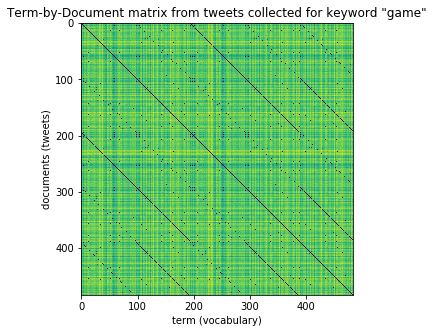

In [33]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the distance matrix for k1_termdoc using the function "compute_euclidean_distance_matrix"
k1_euclidean_distances = compute_euclidean_distance_matrix(k1_termdoc) 
# INSERT YOUR CODE HERE

# Visualise the distance matrix for this keyword
# Hint: using imshow() function
# INSERT YOUR CODE HERE

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_euclidean_distances)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Instruction 2.12**. Similar to the example above for the first keyword, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k2_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

$2000
&amp
&lt
2018
32kph


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

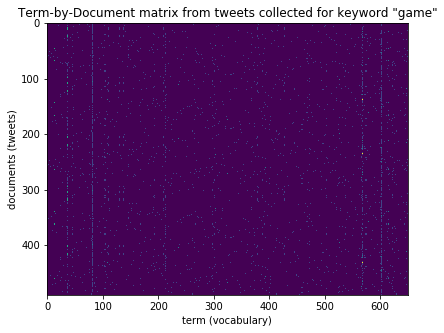

In [34]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k2_tweets_processed
'''
# INSERT YOUR CODE HERE

k2_termdoc, k2_vocab = construct_termdoc(k2_tweets_processed)
'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
for i in range(5):
    print(k2_vocab[i])

'''
Write your code to visualise the term-by-document matrix
'''

# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k2_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

***Instruction 2.13***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **second** keyword. Store this distance matrix in the variable named ***k2_euclidean_distances*** and **visualise** this matrix.

[**Total mark: 10**]

[[0.         5.65685425 6.244998   ... 6.244998   6.244998   5.74456265]
 [5.65685425 0.         5.         ... 5.         5.         5.        ]
 [6.244998   5.         0.         ... 5.47722558 5.47722558 5.29150262]
 ...
 [6.244998   5.         5.47722558 ... 0.         0.         5.47722558]
 [6.244998   5.         5.47722558 ... 0.         0.         5.47722558]
 [5.74456265 5.         5.29150262 ... 5.47722558 5.47722558 0.        ]]


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

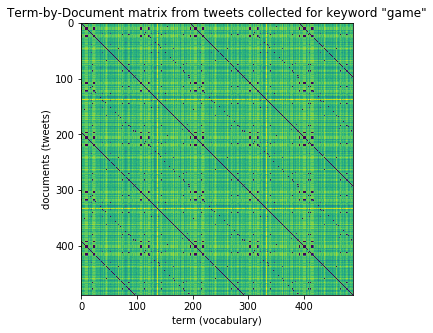

In [35]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
k2_euclidean_distances =  compute_euclidean_distance_matrix(k2_termdoc) 
print(k2_euclidean_distances)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k2_euclidean_distances)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))
# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE


**Instruction 2.14**. Similarly, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k3_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

&amp
&gt
1950s
1960s
1994


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

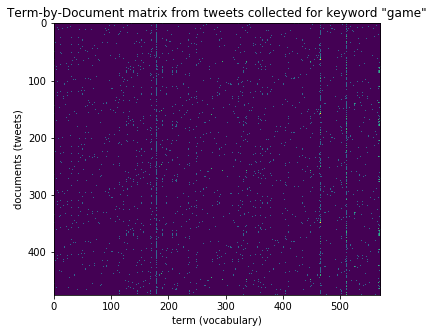

In [36]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k3_tweets_processed
'''
k3_termdoc, k3_vocab = construct_termdoc(k3_tweets_processed)
'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
for i in range(5):
    print(k3_vocab[i])

'''
Write your code to visualise the term-by-document matrix
'''

# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

***Instruction 2.15***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **third** keyword. Store this distance matrix in the variable named ***k3_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

[[0.         4.89897949 5.         ... 5.65685425 5.65685425 5.        ]
 [4.89897949 0.         4.79583152 ... 5.29150262 5.29150262 4.79583152]
 [5.         4.79583152 0.         ... 5.         5.         3.74165739]
 ...
 [5.65685425 5.29150262 5.         ... 0.         0.         4.79583152]
 [5.65685425 5.29150262 5.         ... 0.         0.         4.79583152]
 [5.         4.79583152 3.74165739 ... 4.79583152 4.79583152 0.        ]]


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

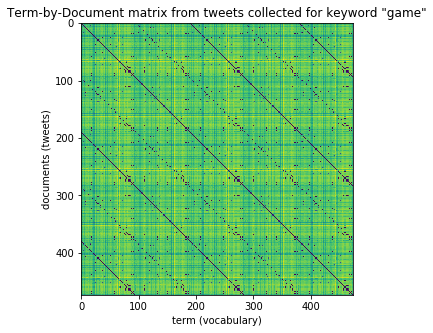

In [37]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
k3_euclidean_distances =  compute_euclidean_distance_matrix(k3_termdoc) 
print(k3_euclidean_distances)

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_euclidean_distances)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))
# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE


### Part 2C: Data Clustering

Thus far in this assignment, we have collected tweets for each keyword and analyse them seperately. We have constructed the term-by-document matrix for each collection of tweets seperately. A fundemantal and common task in data science, analytics, machine learning, science and engineering is **clustering**. This is also known as unsupervised learning or exploratory data analysis as we have learned in our classes.

This part of this assignment will use the Kmeans algorithm learned in our classes to cluster the **entire** colllection of tweets collected for **all** keywords. To do so, we need to compute the **distance** between **any** two pair of tweets. This requires us to compute a **joint** term-by-document matrix for all tweets.

The reason that we **cannot** use the individual term-by-document matrices computed earlier (e.g.,***k1_termdoc, k2_termdoc, k3_termdoc***) for this task is because they have different dictionary sizes. Hence, tweets collected for different keywords have been represented by vectors of different dimension. 

The following piece of codes will help you to inspect these dimensions.

In [38]:
print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[0]))
print('{} x {}\n'.format(k1_termdoc.shape[0],k1_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[1]))
print('{} x {}\n'.format(k2_termdoc.shape[0],k2_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[2]))
print('{} x {}\n'.format(k3_termdoc.shape[0],k3_termdoc.shape[1]))

Dimension of the term-by-document matrix for keyword "game":
485 x 722

Dimension of the term-by-document matrix for keyword "bike":
490 x 650

Dimension of the term-by-document matrix for keyword "fiction":
475 x 571



**Note**. First, we need to gather all tweets together into a new variable named **all_tweets_processed** using the piece of codes below.

In [39]:
all_tweets_processed = k1_tweets_processed + k2_tweets_processed + k3_tweets_processed

**Instruction 2.16**. Your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for all tweets stored in ***all_tweets_processed***, print out the first 5 vocabularies and visualise this term-by-document matrix.

[**Total marks: 5**]

$2000
$5k
$650
$trx
&amp


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

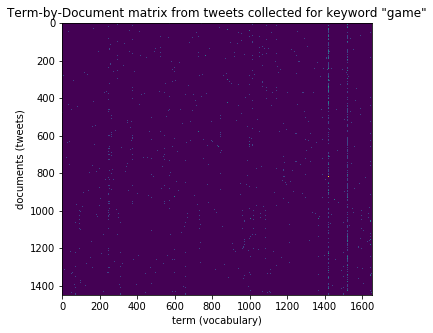

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for all tweets stored 
in all_tweets_processed
'''

all_termdoc, all_vocab = construct_termdoc(all_tweets_processed)
# INSERT YOUR CODE HERE

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
for i in range(5):
    print(all_vocab[i])

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(all_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Instruction 2.17**. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for all tweets collected. Store this distance matrix in the variable named ***all_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function
all_euclidean_distances =  compute_euclidean_distance_matrix(all_termdoc) 
print(all_euclidean_distances)

fig, ax = plt.subplots(figsize=(100, 100))
ax.imshow(all_euclidean_distances)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))  # INSERT YOUR CODE HERE
        
# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE


[[0.         0.         5.         ... 5.09901951 5.09901951 4.12310563]
 [0.         0.         5.         ... 5.09901951 5.09901951 4.12310563]
 [5.         5.         0.         ... 5.74456265 5.74456265 4.89897949]
 ...
 [5.09901951 5.09901951 5.74456265 ... 0.         0.         4.79583152]
 [5.09901951 5.09901951 5.74456265 ... 0.         0.         4.79583152]
 [4.12310563 4.12310563 4.89897949 ... 4.79583152 4.79583152 0.        ]]


Text(0.5,1,'Term-by-Document matrix from tweets collected for keyword "game"')

**Note**. Next, we use Kmeans algorithm to cluster all tweets stored in term-by-document matrix ***all_termdoc***. An important requirement for the Kmeans is the specification of the number of clusters which will be specified the variable **n_clusters**.

The following piece of codes will initialise a ***kmeans*** object to be used for subsequent clustering task.

In [ ]:
'''
Initialise a kmeans object  from scikit-lean package
'''
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init= 'random', n_init=5, max_iter=300,
                verbose=True, tol=0.00001, random_state=123456)


**Instruction 2.18**. Your task is to use the variable ***kmeans*** to perform clustering on the data stored in the variable ***all_termdoc***.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

'''
Use the variable kmeans to perform clustering on the data stored in the variable all_termdoc
Hint: revise the practical session on Kmeans algorithm or check out the documentation from scikit-learn
for Kmeans algorithm.
'''
# INSERT YOUR CODE HERE
kmeans.fit(all_termdoc)

**Instruction 2.19**. Write your codes to print out the cluster centers.

[**Total mark: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to print out the cluster centers.
'''
# INSERT YOUR CODE HERE
clusters = kmeans.fit_predict(all_termdoc)
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_.shape)

print('the cluster center for cluster 1 is' ,kmeans.cluster_centers_[0])
print('the cluster center for cluster 2 is' ,kmeans.cluster_centers_[1])
print('the cluster center for cluster 3 is' ,kmeans.cluster_centers_[2])

**Instruction 2.20**. Write your codes to print out the first **500** cluster labels assigned to the first 500 tweets.

[**Total marks: 5**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to print out the first **500** cluster labels assigned to the first 500 tweets.
'''
# INSERT YOUR CODE HERE
print(kmeans.labels_[0:500])

**Instruction 2.21**. Next, we would like to obtain the quality of our clustering results. Write your code to obtain the labels of tweets for each keyword and store the labels in three new variables ***k1_labels***, ***k2_labels*** and ***k3_labels***, respectively.

**[Total marks: 5]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

'''
Write your code to obtain the labels of tweets for each keyword
and store the labels of the first keyword in ***k1_labels***, 
the labels of the second keyword in ***k2_labels*** and
the labels of the third keyword in ***k3_labels***.
'''
# INSERT YOUR CODE HERE
k1_labels = []
k2_labels = []
k3_labels = []
for z in kmeans.labels_:
    if z == 0:
        k1_labels.append(z)
    elif z == 1:
        k2_labels.append(z)
    else:
        k3_labels.append(z)
print(k1_labels)

**Instruction 2.22**. Then, we examine what is the proprotion of tweets from different keywords (or categories) appear in the **first** cluster. Remember that **0** is the label for the first cluster (**1** for the second and **2** for the third clusters). Your tasks are:

1. Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster. **(5 marks)**

2. Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster. **(5 marks)**

**[Total mark: 10]**

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster.
Hint: you might want to use numpy.where function.
'''
# obtain the list of tweet indices of keyword k1 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k1_labels
k1_idx_label0 = 

# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels
k2_idx_label0 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels
k3_idx_label0 = # INSERT YOUR CODE HERE


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster.
Hint: you need to plot a bar chart with three bars, 
each bar represents the number of tweets of each keyword that are assigned to the first cluster.
'''
# INSERT YOUR CODE HERE


**Instruction 2.23**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **second** cluster and plot a bar chart visualise this information.

[**Total mark: 8**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k1_labels
k1_idx_label1 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k2_labels
k2_idx_label1 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k3_labels
k3_idx_label1 = # INSERT YOUR CODE HERE

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the second cluster
# INSERT YOUR CODE HERE


**Instruction 2.24**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **third** cluster and plot a bar chart visualise this information.

[**Total mark: 8**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k1_labels
k1_idx_label2 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k2 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k2_labels
k2_idx_label2 = # INSERT YOUR CODE HERE

# obtain the list of tweet indices of keyword k3 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k3_labels
k3_idx_label2 = # INSERT YOUR CODE HERE

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the third cluster
# INSERT YOUR CODE HERE
b == 3
print(type(b))

### END OF ASSIGNMENT 2 NOTEBOOK

----